In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from settings import *
import mceq_config as config
from MCEq.core import MCEqRun
import crflux.models as pm
import pickle
from tqdm import tqdm
from scipy.interpolate import splrep, splev, RegularGridInterpolator

In [20]:
# own version
config.e_min = 0.1
config.e_max = 1E10

mceq = MCEqRun(
    interaction_model='SIBYLL2.3c',
    primary_model = (pm.HillasGaisser2012, "H3a"),
    theta_deg=0.0,
    density_model=('MSIS00_IC',('SouthPole','January'))
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [22]:
# matthias
config.e_min = 0.1
config.e_max = 1E10
mceq = MCEqRun(
    interaction_model='SIBYLL2.3c',
    theta_deg=0.,
    density_model=('MSIS00_IC',('SouthPole','January')), ###
    primary_model=(pm.GlobalSplineFitBeta,
         '../resources/GSF_spline_20171007.pkl.bz2')
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): GlobalSplineFitBeta ../resources/GSF_spline_20171007.pkl.bz2


In [29]:
mag = 0
#Define equidistant grid in cos(theta)
#angles = np.arccos(np.linspace(1, -1, 21))*180./np.pi
angles = np.rad2deg(np.arccos(np.linspace(1, -1, 21)))
flux_def = dict()

all_component_names = [
    'numu_conv','numu_pr','numu_total',
    'mu_conv','mu_pr','mu_total',
    'nue_conv','nue_pr','nue_total','nutau_pr'
]

#Initialize empty grid
for frac in all_component_names:
    flux_def[frac] = np.zeros((len(mceq.e_grid), len(angles)))

#Sum fluxes, calculated for different angles
for ti, theta in tqdm(enumerate(angles)):
    mceq.set_theta_deg(theta)
    mceq.solve()
    
    # same meaning of prefixes for muon neutrinos as for muons
    flux_def['mu_conv'][:,ti] = (mceq.get_solution('conv_mu+', mag)
                         + mceq.get_solution('conv_mu-', mag))

    flux_def['mu_pr'][:,ti] = (mceq.get_solution('pr_mu+', mag)
                       + mceq.get_solution('pr_mu-', mag))

    flux_def['mu_total'][:,ti] = (mceq.get_solution('total_mu+', mag)
                          + mceq.get_solution('total_mu-', mag))
    
    
    # same meaning of prefixes for muon neutrinos as for muons
    flux_def['numu_conv'][:,ti] = (mceq.get_solution('conv_numu', mag)
                         + mceq.get_solution('conv_antinumu', mag))

    flux_def['numu_pr'][:,ti] = (mceq.get_solution('pr_numu', mag)
                       + mceq.get_solution('pr_antinumu', mag))

    flux_def['numu_total'][:,ti] = (mceq.get_solution('total_numu', mag)
                          + mceq.get_solution('total_antinumu', mag))

    # same meaning of prefixes for electron neutrinos as for muons
    flux_def['nue_conv'][:,ti] = (mceq.get_solution('conv_nue', mag)
                        + mceq.get_solution('conv_antinue', mag))

    flux_def['nue_pr'][:,ti] = (mceq.get_solution('pr_nue', mag)
                      + mceq.get_solution('pr_antinue', mag))

    flux_def['nue_total'][:,ti] = (mceq.get_solution('total_nue', mag)
                         + mceq.get_solution('total_antinue', mag))


    # since there are no conventional tau neutrinos, prompt=total
    flux_def['nutau_pr'][:,ti] = (mceq.get_solution('total_nutau', mag)
                        + mceq.get_solution('total_antinutau', mag))
print("\U0001F973")

1it [00:03,  3.96s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 25.84


2it [00:08,  4.26s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 36.87


3it [00:13,  4.58s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 45.57


4it [00:18,  4.98s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 53.13


5it [00:25,  5.58s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 60.00


6it [00:33,  6.37s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 66.42


7it [00:43,  7.53s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 72.54


8it [00:55,  9.02s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 78.46


9it [01:13, 11.68s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle = 84.26


10it [01:39, 16.28s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -89.86 for zenith angle = 90.00


11it [03:08, 38.41s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -78.52 for zenith angle = 95.74
MSIS00IceCubeCentered::set_theta(): theta = 95.74 below horizon. using theta = 84.26


12it [03:33, 34.48s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -66.93 for zenith angle = 101.54
MSIS00IceCubeCentered::set_theta(): theta = 101.54 below horizon. using theta = 78.46


13it [03:50, 29.05s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -55.08 for zenith angle = 107.46
MSIS00IceCubeCentered::set_theta(): theta = 107.46 below horizon. using theta = 72.54


14it [04:02, 23.91s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -42.84 for zenith angle = 113.58
MSIS00IceCubeCentered::set_theta(): theta = 113.58 below horizon. using theta = 66.42


15it [04:11, 19.52s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -30.00 for zenith angle = 120.00
MSIS00IceCubeCentered::set_theta(): theta = 120.00 below horizon. using theta = 60.00


16it [04:19, 15.93s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -16.26 for zenith angle = 126.87
MSIS00IceCubeCentered::set_theta(): theta = 126.87 below horizon. using theta = 53.13


17it [04:25, 13.07s/it]

MSIS00IceCubeCentered::set_theta(): latitude = -1.15 for zenith angle = 134.43
MSIS00IceCubeCentered::set_theta(): theta = 134.43 below horizon. using theta = 45.57


18it [04:31, 10.82s/it]

MSIS00IceCubeCentered::set_theta(): latitude = 16.26 for zenith angle = 143.13
MSIS00IceCubeCentered::set_theta(): theta = 143.13 below horizon. using theta = 36.87


19it [04:36,  9.05s/it]

MSIS00IceCubeCentered::set_theta(): latitude = 38.32 for zenith angle = 154.16
MSIS00IceCubeCentered::set_theta(): theta = 154.16 below horizon. using theta = 25.84


20it [04:40,  7.66s/it]

MSIS00IceCubeCentered::set_theta(): latitude = 90.00 for zenith angle = 180.00
MSIS00IceCubeCentered::set_theta(): theta = 180.00 below horizon. using theta =  0.00


21it [04:44, 13.56s/it]

🥳


In [30]:
with open("../resources/MCEq_flux.pckl", "wb") as f:
    pickle.dump(((mceq.e_grid, angles), flux_def), f)

# Show the background spectrum

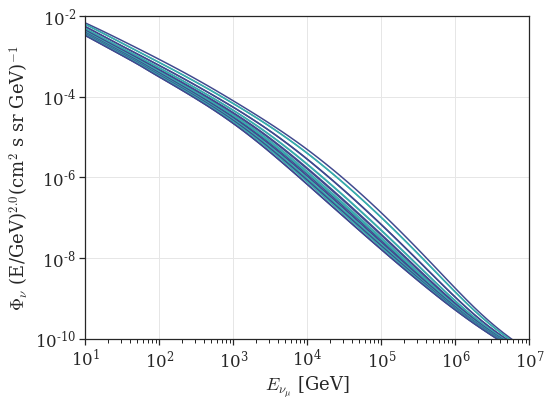

In [31]:
e_grid = mceq.e_grid
spec = 2.
fig, ax = plt.subplots(figsize=(8, 6))
for ti, ang in enumerate(angles):
    for i, (pref, lab) in enumerate([('numu_', r'\nu_\mu')]):

        p0 = ax.loglog(
            e_grid,
            e_grid**(spec)*flux_def[pref + 'total'][:,ti],
            ls='solid',
            lw=1.5,
            #label=fr"$\theta=${ang:1.2f}"
        )
    
ax.set_xlim(10,1e7)
ax.set_ylim(1e-10,1e-2)
ax.set_xlabel(r"$E_{{{0}}}$ [GeV]".format(lab))
#ax.legend(loc='upper right', frameon=False, numpoints=1)
ax.set_ylabel(
    r"$\Phi_{\nu}$ (E/GeV)$^{" + str(spec) +" }$" + "(cm$^{2}$ s sr GeV)$^{-1}$"
)
#ax.set_title(f"zenith angle {ang:1.2f}")
fig.tight_layout()

## check event numbers with effective areas

In [32]:
with open("../resources/tabulated_logE_sindec_aeff.pckl", "rb") as f:
    log_ebins, sindec_bins, aeff_i = pickle.load(f)

log_emids = calc_mids(log_ebins)
ebins = np.power(10, log_ebins)
emids = calc_mids(ebins)
ewidth = np.diff(ebins)

sindec_mids = calc_mids(sindec_bins)
sindec_width = np.diff(sindec_bins)

In [33]:
closest_MCEq_energy_idx = lambda e: np.argmin(np.abs(e-mceq.e_grid))
closest_MCEq_ang_idx = lambda t: np.argmin(np.abs(t-angles))

# get the mceq flux values within the respective energy bins
ind_mceq_e = np.array([closest_MCEq_energy_idx(ei) for ei in emids])
ind_mceq_t = np.array([closest_MCEq_ang_idx(ti) for ti in np.rad2deg(np.arcsin(sindec_mids)) + 90])
scaler = 3.7

tck_numu = RegularGridInterpolator(
    (mceq.e_grid, -np.cos(np.deg2rad(angles))), 
    np.log(flux_def['numu_conv'])
)

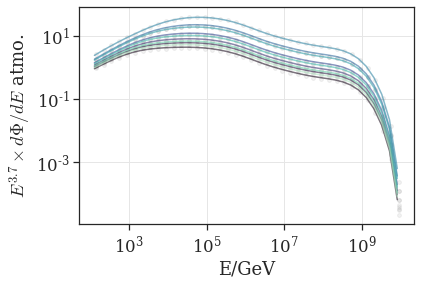

In [36]:
skipper = 5
sns.set_palette("mako", len(sindec_mids)//skipper)


fig, ax = plt.subplots()
for ti, sdm in enumerate(sindec_mids[::skipper]):
    spl_vals = np.exp(tck_numu((emids, np.full_like(emids, sdm))))
    ax.plot(emids, spl_vals * emids**scaler, alpha=0.6)
    ax.scatter(
        mceq.e_grid[ind_mceq_e],
        flux_def['numu_conv'][ind_mceq_e, ind_mceq_t[ti*skipper]] * mceq.e_grid[ind_mceq_e]**scaler,
        marker='o',
        s=15,
        color="gray",
        alpha=0.1
    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('E/GeV')
    ax.set_ylabel(r"$E^{3.7} \times d\Phi / dE$ atmo.")


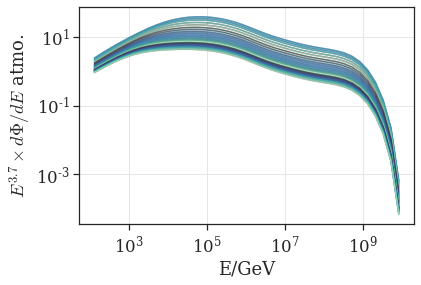

In [38]:
sns.set_palette("mako", len(sindec_mids)//5)


fig, ax = plt.subplots()
for ti, sdm in enumerate(sindec_mids):#[:100:3]):
    spl_vals = np.exp(tck_numu((emids, np.full_like(emids, sdm))))
    ax.plot(emids, spl_vals * emids**scaler, alpha=0.6)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('E/GeV')
    ax.set_ylabel(r"$E^{3.7} \times d\Phi / dE$ atmo.")


### event numbers - conv

In [39]:
aeff_factor = lambda aeff: ((aeff * sindec_width).T * ewidth) * 1E4 * livetime * 4*np.pi

In [40]:
ee, ss = np.meshgrid(emids, sindec_mids)
spl_vals = tck_numu((ee, ss))

50558852123.39215
12573957266.33253


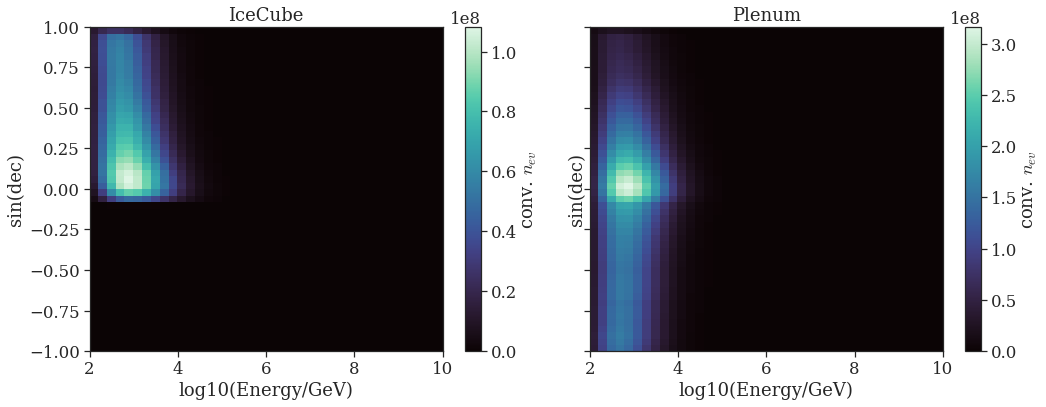

In [41]:
fig, axes=plt.subplots(ncols=2, figsize=(15,6), sharey=True)
ax = axes[0]
ax.set_title('IceCube')
p = ax.pcolormesh(
    log_ebins,
    sindec_bins, 
    aeff_factor(aeff_i['IceCube']) * np.exp(spl_vals),
)
cb = fig.colorbar(p,ax=ax)
cb.set_label(r'conv. $n_{ev}$')

ax = axes[1]
ax.set_title('Plenum')
p = ax.pcolormesh(
    log_ebins,
    sindec_bins, 
    aeff_factor(aeff_i['Plenum']) * np.exp(spl_vals),
)
for ax in axes:
    ax.set_xlabel(r'log10(Energy/GeV)')
    ax.set_ylabel(r'sin(dec)')

cb = fig.colorbar(p,ax=ax)
cb.set_label(r'conv. $n_{ev}$')
fig.tight_layout()

print(np.sum(aeff_factor(aeff_i['Plenum']) * np.exp(spl_vals)))
print(np.sum(aeff_factor(aeff_i['IceCube']) * np.exp(spl_vals)))


### astro flux

In [42]:
print(livetime)
print(gamma_astro)
print(phi_astro)

315567360.0
-2.37
1.3600000000000003e-18


54587396.84172362
218305108.85243794


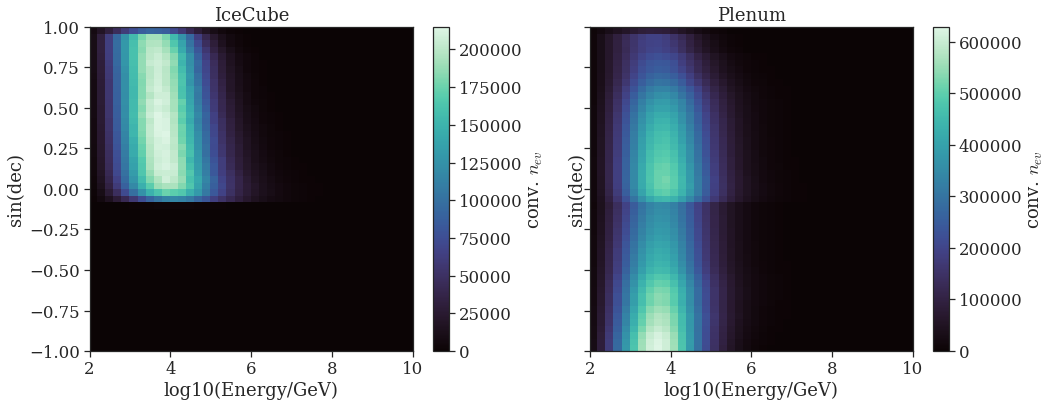

In [43]:
fig, axes=plt.subplots(ncols=2, figsize=(15,6), sharey=True)

ax = axes[0]
ax.set_title('IceCube')
p = ax.pcolormesh(
    log_ebins,
    sindec_bins, 
    aeff_factor(aeff_i['IceCube']) * (emids/1E5)**(gamma_astro) * phi_astro,
)
cb = fig.colorbar(p,ax=ax)
cb.set_label(r'conv. $n_{ev}$')

ax = axes[1]
ax.set_title('Plenum')
p = ax.pcolormesh(
    log_ebins,
    sindec_bins, 
    aeff_factor(aeff_i['Plenum']) * (emids/1E5)**(gamma_astro) * phi_astro,
)
for ax in axes:
    ax.set_xlabel(r'log10(Energy/GeV)')
    ax.set_ylabel(r'sin(dec)')

cb = fig.colorbar(p,ax=ax)
cb.set_label(r'conv. $n_{ev}$')
fig.tight_layout()

print(np.sum(aeff_factor(aeff_i['IceCube']) * (emids/1E5)**(gamma_astro) * phi_astro))
print(np.sum(aeff_factor(aeff_i['Plenum']) * (emids/1E5)**(gamma_astro) * phi_astro))